# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame(pd.read_csv('petrol.csv'))   
df = df.replace(' ','') # removing the whitespaces

0     3571
1     4092
2     3865
3     4870
4     4399
5     5342
6     5319
7     5126
8     4447
9     4512
10    4391
11    5126
12    4817
13    4207
14    4332
15    4318
16    4206
17    3718
18    4716
19    4341
20    4593
21    4983
22    4897
23    4258
24    4574
25    3721
26    3448
27    3846
28    4188
29    3601
30    3640
31    3333
32    3063
33    3357
34    3528
35    3802
36    4045
37    3897
38    3635
39    4345
40    4449
41    3656
42    4300
43    3745
44    5215
45    4476
46    4296
47    5002
Name: income, dtype: int64

In [2]:
df.describe()

tax       income       highway         dl  consumption
count  48.000000    48.000000     48.000000  48.000000    48.000000
mean    7.668333  4241.833333   5565.416667   0.570333   576.770833
std     0.950770   573.623768   3491.507166   0.055470   111.885816
min     5.000000  3063.000000    431.000000   0.451000   344.000000
25%     7.000000  3739.000000   3110.250000   0.529750   509.500000
50%     7.500000  4298.000000   4735.500000   0.564500   568.500000
75%     8.125000  4578.750000   7156.000000   0.595250   632.750000
max    10.000000  5342.000000  17782.000000   0.724000   968.000000

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [73]:
# finding the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
mincap = (Q1-1.5*IQR)
print(mincap)
maxcap = (Q3+1.5*IQR)
print(maxcap)



tax               1.1250
income          839.7500
highway        4045.7500
dl                0.0655
consumption     123.2500
dtype: float64
tax               5.3125
income         2479.3750
highway       -2958.3750
dl                0.4315
consumption     324.6250
dtype: float64
tax                9.8125
income          5838.3750
highway        13224.6250
dl                 0.6935
consumption      817.6250
dtype: float64


In [72]:
#Cap the outliers
df[['tax','dl']] = df[['tax','dl']].apply(pd.to_numeric, errors = 'ignore')
df.loc[( df['tax'] > 5.31) & (df['tax']< 9.81) & ( df['income'] > 2479.3750) & (df['income']< 5838.3750) & ( df['highway'] >  -2958.3750) & (df['highway']< 13224.6250) & ( df['consumption'] >  324.6250) & (df['consumption']<   817.6250)]

tax  income  highway     dl  consumption
0   9.00    3571     1976  0.525          541
1   9.00    4092     1250  0.572          524
2   9.00    3865     1586  0.580          561
3   7.50    4870     2351  0.529          414
4   8.00    4399      431  0.544          410
6   8.00    5319    11868  0.451          344
7   8.00    5126     2138  0.553          467
8   8.00    4447     8577  0.529          464
9   7.00    4512     8507  0.552          498
10  8.00    4391     5939  0.530          580
12  7.00    4817     6930  0.574          525
13  7.00    4207     6580  0.545          508
14  7.00    4332     8159  0.608          566
15  7.00    4318    10340  0.586          635
16  7.00    4206     8508  0.572          603
17  7.00    3718     4725  0.540          714
19  8.50    4341     6010  0.677          640
20  7.00    4593     7834  0.663          649
21  8.00    4983      602  0.602          540
22  9.00    4897     2449  0.511          464
23  9.00    4258     4686  0.517          547
24  8.50    4574     2619  0.551          460
25  9.00    3721     4746  0.544          566
26  8.00    3448     5399  0.548          577
27  7.50    3846     9061  0.579          631
28  8.00    4188     5975  0.563          574
29  9.00    3601     4650  0.493          534
30  7.00    3640     6905  0.518          571
31  7.00    3333     6594  0.513          554
32  8.00    3063     6524  0.578          577
33  7.50    3357     4121  0.547          628
34  8.00    3528     3495  0.487          487
35  6.58    3802     7834  0.629          644
37  7.00    3897     6385  0.586          704
38  8.50    3635     3274  0.663          648
40  7.00    4449     4639  0.626          587
41  7.00    3656     3985  0.563          699
42  7.00    4300     3635  0.603          632
43  7.00    3745     2611  0.508          591
44  6.00    5215     2302  0.672          782
45  9.00    4476     3942  0.571          510
46  7.00    4296     4083  0.623          610
47  7.00    5002     9794  0.593          524

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

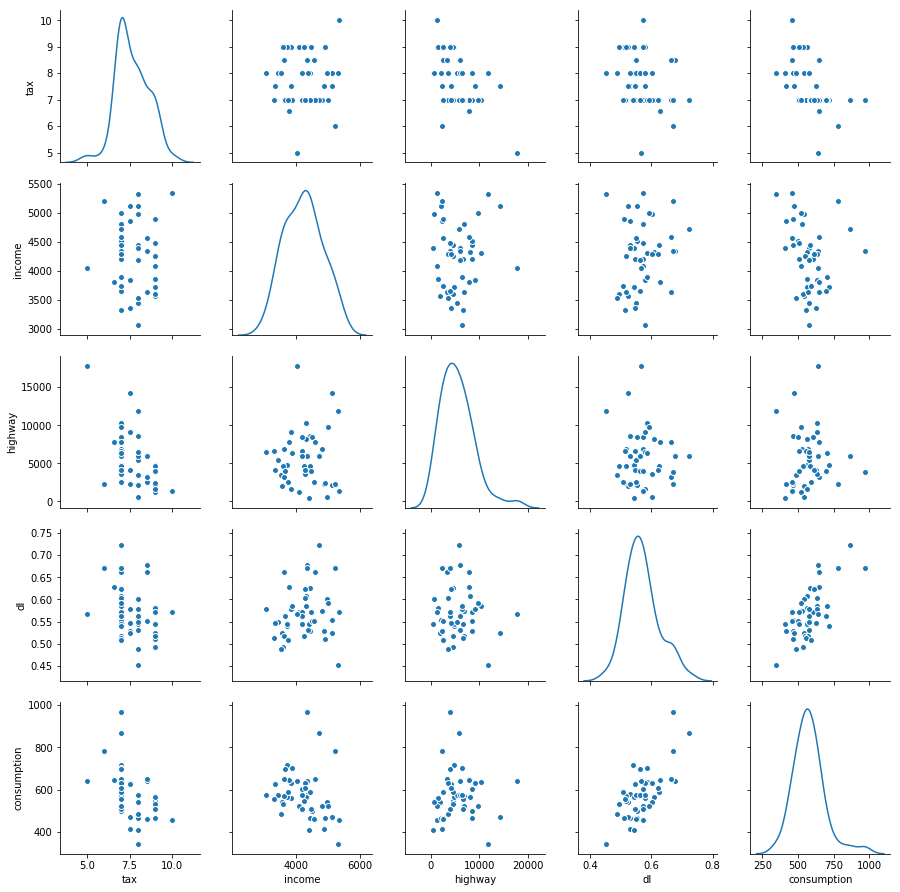

In [4]:
#Plot a density curve
con_df = df.iloc[ :, 0:5]
sns.pairplot(con_df, diag_kind = 'kde')

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [79]:
#Devide the feature
X = df[['dl','tax']]
y = df[['consumption']]

In [80]:
print(X)
print(y)

       dl    tax
0   0.525   9.00
1   0.572   9.00
2   0.580   9.00
3   0.529   7.50
4   0.544   8.00
5   0.571  10.00
6   0.451   8.00
7   0.553   8.00
8   0.529   8.00
9   0.552   7.00
10  0.530   8.00
11  0.525   7.50
12  0.574   7.00
13  0.545   7.00
14  0.608   7.00
15  0.586   7.00
16  0.572   7.00
17  0.540   7.00
18  0.724   7.00
19  0.677   8.50
20  0.663   7.00
21  0.602   8.00
22  0.511   9.00
23  0.517   9.00
24  0.551   8.50
25  0.544   9.00
26  0.548   8.00
27  0.579   7.50
28  0.563   8.00
29  0.493   9.00
30  0.518   7.00
31  0.513   7.00
32  0.578   8.00
33  0.547   7.50
34  0.487   8.00
35  0.629   6.58
36  0.566   5.00
37  0.586   7.00
38  0.663   8.50
39  0.672   7.00
40  0.626   7.00
41  0.563   7.00
42  0.603   7.00
43  0.508   7.00
44  0.672   6.00
45  0.571   9.00
46  0.623   7.00
47  0.593   7.00
    consumption
0           541
1           524
2           561
3           414
4           410
5           457
6           344
7           467
8           464
9      

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [81]:
#import train_test_split and linearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 1)

In [86]:
print("Shape of train set is ", X_train.shape , y_train.shape)
print("Shape of test set is ", X_test.shape , y_test.shape)

Shape of train set is  (38, 2) (38, 1)
Shape of test set is  (10, 2) (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [87]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for dl is 1250.7435957689188
The coefficient for tax is -35.84669219774453


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [93]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.5436649850739002
0.5904039469252054


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [94]:
M = df[['dl','tax','income','highway']]
print("shape of train is ",M.shape)

shape of train is  (48, 4)


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
M_train, M_test, n_train, n_test = train_test_split(M, y, test_size = .20, random_state=1)
#print("shape of train is ",n_train.shape)
regression_model = LinearRegression()
regression_model.fit(M_train,n_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [97]:
for idx, col_name in enumerate(M_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][0]))

The coefficient for dl is 1355.8276058500633
The coefficient for tax is 1355.8276058500633
The coefficient for income is 1355.8276058500633
The coefficient for highway is 1355.8276058500633


In [100]:
print(regression_model.score(M_train,n_train))
print(regression_model.score(M_test,n_test))

0.6751909554104613
0.6611179509319896


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
# R-squared is a handy, seemingly intuitive measure of how well your linear model fits a set of observations. 
#However, as we saw, R-squared doesnâ€™t tell us the entire story.
#While R-squared provides an estimate of the strength of the relationship between your model and the response variable,
#it does not provide a formal hypothesis test for this relationship
